# Question 1a: %timeit
You may know from your experiences with matlab that you should always prefer vector- or matrix-based operations over for loops, if possible (hence the name **mat**(rix)**lab**(oratory)). The same is true of python -- you should prefer numpy-array-based operations over for loops. This will also be important for tensorflow -- as much as possible, you should avoid using python for loops when writing tensorflow code. To examine the impact of using for loops over numpy-array-based operations, for this question, you will exploit one of jupyter's built-in magic commands, `%timeit`:

In [1]:
import numpy as np
%timeit np.zeros((100,100))  # provide statistics on how long it takes to generate a 100x100 array of 0s

2.18 µs ± 25.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


As you can see, all you need to do is put `%timeit` before the command that you would normally run and jupyter will run that line multiple times to generate computation timing statistics.

Now, let's compare the computation timing for multiplying two random matrices, each with a dimension of 100x100, using 1) `np.matmul` and 2) multiple embedded for loops. For (2), please write your own function to implement the for loops. Feel free to wrap (2) into a function definition. Verify that (1) and (2) produce the same output. According to `%timeit`, how many times faster is (1) than (2)?

In [2]:
# your code here
A = np.random.randint(100, size=(100,100))
B = np.random.randint(100, size=(100,100))

def mult(A,B):
    C = np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            for k in range(100):
                C[i][j] += A[i][k] * B[k][j]
    return C

%timeit np.matmul(A,B)
%timeit mult(A,B)
np.array_equal(np.matmul(A,B), mult(A,B))

355 µs ± 547 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
703 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


True

#### Answer 
(1) is about 2000 times faster than (2)

# Question 1b
There are two main ways of computing convolutions digitally: 1) directly, using the definition of a convolution, and 2) using the convolution theorem that you proved in the written portion of this homework assignment (i.e., using ffts). Which method is more efficient depends on the sizes of the inputs. Let's use `%timeit` to compare the speeds for 1D convolutions using [`scipy.signal.convolve `](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html). This function has an argument called "method", which can be set to "direct" or "fft", which correspond to (1) and (2) above. Use this function to convolve two random 1D signals of lengths $n=100, 500, 1000,$ and $2000$, and compare the speed of both methods. For which n do(es) method 1 outperform method 2, and vice versa? Can you make any generalizations based on these results about when one method outperforms the other?

In [3]:
import scipy
from scipy.signal import convolve
# your code here; feel free to use multiple cells
a = np.random.randint(100,size=100)
b = np.random.randint(100,size=100)
%timeit scipy.signal.convolve(a, b, method = "direct")
%timeit scipy.signal.convolve(a, b, method = "fft")

7.77 µs ± 69.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
104 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [4]:
a = np.random.randint(100,size=500)
b = np.random.randint(100,size=500)
%timeit scipy.signal.convolve(a, b, method = "direct")
%timeit scipy.signal.convolve(a, b, method = "fft")

112 µs ± 51.4 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
140 µs ± 682 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
a = np.random.randint(100,size=1000)
b = np.random.randint(100,size=1000)
%timeit scipy.signal.convolve(a, b, method = "direct")
%timeit scipy.signal.convolve(a, b, method = "fft")

424 µs ± 2.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
177 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
a = np.random.randint(100,size=2000)
b = np.random.randint(100,size=2000)
%timeit scipy.signal.convolve(a, b, method = "direct")
%timeit scipy.signal.convolve(a, b, method = "fft")

1.66 ms ± 6.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
260 µs ± 642 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Answer
Direct is faster than fft at n=100, and n=500, and slower for the other two. I think we can say that fft is quicker for larger data sizes

# Question 2: the convolution theorem
As we investigated in question 1b, it is also possible to do convolutions using Fourier transforms, and in some cases this is the preferable method. In fact, there is some body of work investigating the use of ffts and multiplication to do convolution operations in convolutional neural networks. 

For this question, to illustrate this theorem, given a convolutional kernel you will find the corresponding Fourier operation that produces the same result. To this end,

1. create a 7x7 Gaussian kernel with a standard deviation $\sigma=2$ (using a pixel grid spacing of 1)
2. load an image, if it is color then convert it to grayscale (you can just sum the 3 color channels), and then resize the image into a 128x128 array
3. compute the convolution  - you can use a numpy (np) or scipy function. Make sure the output is the same size as the input image, which is slightly different than the formal definition of a discrete convolution, but is something that is usually convenient to do.
4. Find the Fourier filter that does the same operation in the Fourier domain, and show the resulting blurred image implemented using the Fourier method (i.e., if $I_{2}=I_{1}*h$, then $\mathcal{F}[I_{2}]=\mathcal{F}[I_{1}]\mathcal{F}[h]$, so find the correct array for $\mathcal{F}[h]$ and re-generate $I_2$). 

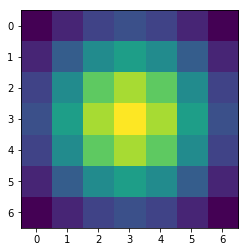

In [7]:
# the following line will cause subsequent plotting commands to display directly in the notebook
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.signal import gaussian, convolve2d
from scipy.misc import imresize

kernel = gaussian(7,std=2) # gaussian array
kernel = np.outer(kernel,kernel) # outer product with itself to get the square kernel
plt.imshow(kernel)
kernel_shifted = np.pad(kernel, (0,121), "constant", constant_values = 0) # pad zeros to make size equal

C:\Users\ameyc\Miniconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


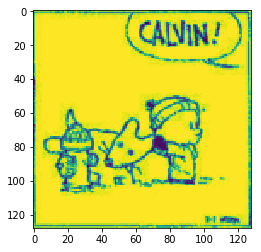

In [8]:
ch = plt.imread("ch.jpg")
ch = ch[:,:,0] + ch[:,:,1] + ch[:,:,2]
ch = ch//3
ch = imresize(ch, size=(128,128))
plt.imshow(ch)

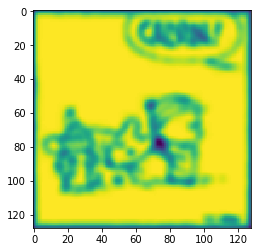

In [9]:
ch_blur = convolve2d(ch, kernel, mode="same", boundary="fill", fillvalue=0)
plt.imshow(ch_blur)

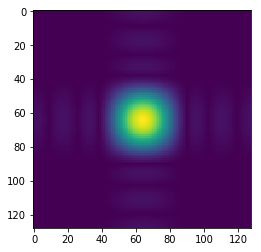

In [10]:
# fourier of kernel
kernel_f = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(kernel_shifted)))
plt.imshow(np.absolute(kernel_f)) # required array

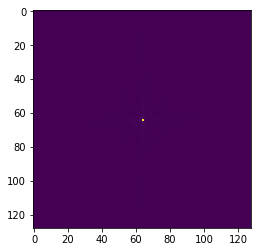

In [11]:
# fourier convolution
ch_f = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(ch)))
ch_blur_f = np.multiply(kernel_f,ch_f)
plt.imshow(np.absolute(ch_f))

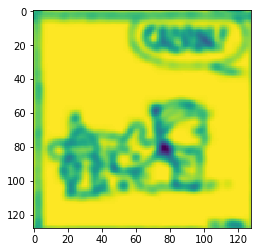

In [12]:
ch_recovered = np.fft.ifft2(ch_blur_f)
plt.imshow(np.absolute(ch_recovered))

# Question 3: data augmentation
One indispensable tool used in deep learning is data augmentation. That is, we can to some extent artificially increase the size of our dataset by randomly altering the current dataset. One common augmenting operation is to do random crops of the original image. For example, researchers designing neural networks for ImageNet, a dataset of natural RGB images, typically resize the images to 256x256x3 and then take a random 224x224x3 crop such that the latter fits entirely in the former.

For this question, take a picture with your phone or find a picture online, load it into jupyter, resize it to 256x256x3 (discard the alpha channel if one is present), and then perform the random 224x224x3 crop. The crops should be uniformly distributed within the bounding 256x256 box and do not need to be rotated. Please display the 256x256x3 image and 5 random crops using `plt.imshow`.

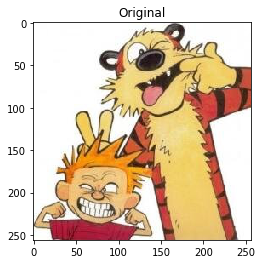

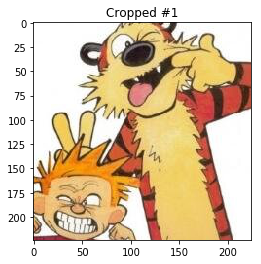

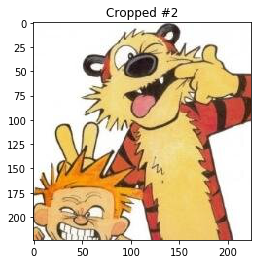

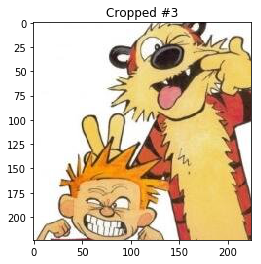

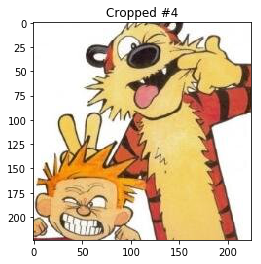

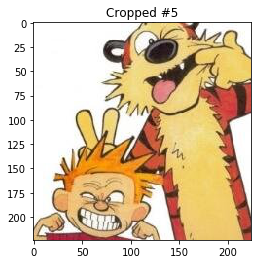

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# your code here; feel free to use multiple cells
img = plt.imread("color.jpg")
plt.figure()
plt.imshow(img)
plt.title("Original")
start = np.random.randint(32, size=(5,2))
for i in range(5):
    crop = img[(start[i][0]):(start[i][0]+224), (start[i][1]):(start[i][1]+224), :]
    plt.figure()
    plt.imshow(crop)
    plt.title("Cropped #{}".format(i+1))